# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/lchenhub/eds220-hwk-3-v2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.

### Spilling incidents in the state of New York
Source: New York State Department of Environmental Conservation
Dated: November 8, 2023
Date accessed: November 8, 2023

Description:  Contains records of spills of petroleum and other hazardous materials. Under State law and regulations, spills that could pollute the lands or waters of the state must be reported by the spiller (and, in some cases, by anyone who has knowledge of the spill). 


### TIGER shapefile from the US Census Bureau
Source: US Census Bureau, Geography Division
Dated: 2022
Date accessed: November 8, 2023

Description:  The TIGER/Line Shapefiles are extracts of selected geographic and cartographic information from the Census Bureau's Master Address File (MAF)/Topologically Integrated Geographic Encoding and Referencing (TIGER) system. The shapefiles include information for the fifty states, the District of Columbia, Puerto Rico, and the Island Areas (American Samoa, the Commonwealth of the Northern Mariana Islands, Guam, and the United States Virgin Islands). The shapefiles include polygon boundaries of geographic areas and features, linear features including roads and hydrography, and point features. 


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

['Other' 'Petroleum' 'Hazardous Material' 'Oxygenates']
['Westchester' 'Queens' 'Bronx' 'Sullivan' 'Cortland' 'New York' 'Ulster'
 'Kings' 'Orange' 'Dutchess' 'Onondaga' 'Saratoga' 'Cayuga' 'Oswego'
 'Warren' 'Niagara' 'Rockland' 'Nassau' 'Jefferson' 'Schenectady' 'Albany'
 'Monroe' 'St Lawrence' 'Richmond' 'Clinton' 'Lewis' 'Essex' 'Chenango'
 'Erie' 'Livingston' 'Wayne' 'Suffolk' 'Orleans' 'Ontario' 'Genesee'
 'Otsego' 'Tompkins' 'Madison' 'Chemung' 'Seneca' 'Oneida' 'Broome'
 'Hamilton' 'Washington' 'Schuyler' 'Franklin' 'Columbia' 'Fulton'
 'Herkimer' 'Schoharie' 'Rensselaer' 'Montgomery' 'Putnam' 'Delaware'
 'New Jersey - Region 2' 'Steuben' 'Tioga' 'Chautauqua' 'Cattaraugus'
 'Wyoming' 'Yates' 'Greene' 'Pennsylvania - Region 9' 'Allegany'
 'New Jersey - Region 3 (N)' 'Cattaraugus Indian Reservation'
 'New Jersey - Region 3 (T)' 'Canada - Region 6' 'Canada - Region 9'
 'Pennsylvania - Region 8' 'Vermont - Region 5 (R)' 'Vermont - Region 4'
 'Connecticut - Region 3 (N)' 'Pennsylvan

(-80.16184495, -71.37823605, 40.24961365, 45.24282935)

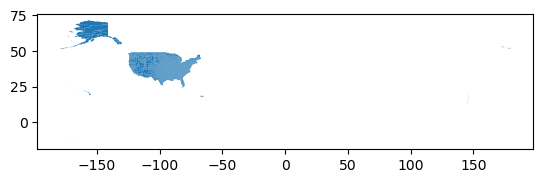

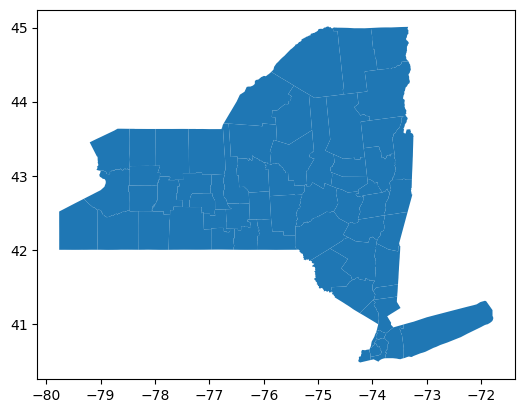

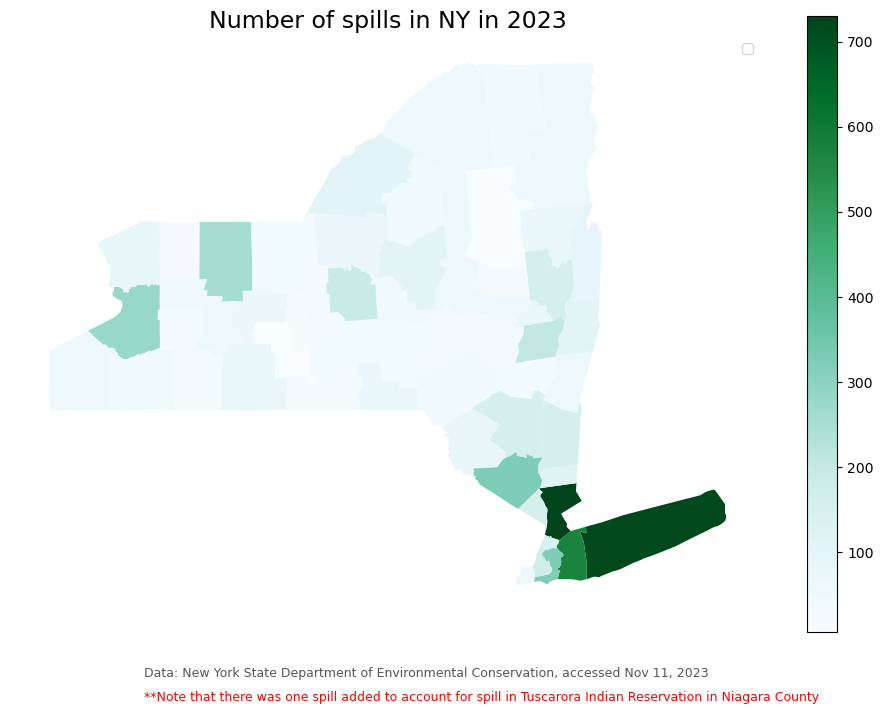

In [1]:
### ===== FINAL CODE =====

# imported libraries here
# imported numpy too

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import NY spills data
spills = pd.read_csv('data/Spill_Incidents_20231109.csv')

#import counties data
counties = gpd.read_file('data/tl_2022_us_county/')
counties.head()

#update pandas display options to display all column when looking at dataframes
pd.set_option("display.max.columns", None)

##prepare data by the following:

# 1. Use .head() to check 'spills' head
spills.head(3)

# 2. simplify by updating column names to small caps
spills.columns = spills.columns.str.lower()

# 3. check data types of columns using .dtypes
spills.dtypes

# 4. Check the unique values in the material_family column using .unique()
print(spills['material family'].unique())

# 5. Check the unique values in the county column using .unique()
print(spills['county'].unique())

##select data by doing the following:

# Convert the date to datetime64
spills['spill date'] = pd.to_datetime(spills['spill date'])

# select data between Jan 1st, 2023 and Oct 31, 2023 and name as petr_23
petr_23 = spills.loc[(spills['material family'] == 'Petroleum') & (spills['spill date'] > '01/01/2023') & (spills['spill date'] < '10/31/2023')]

# print unique values of petr_23 to check that only petroleum spills are included
#petr_23['material family'].unique() 

# verify that only 2023 data has been included
#petr_23['spill date'].dt.year.unique()

# verify that only 2023 data has been included
#petr_23['spill date'].dt.year.unique()

# verify that only 2023 data has been included
#petr_23['spill date'].dt.year.unique()

##aggregate data by doing the following:

# Start with petr_23 and include bullets above to create a new df called 'spills_per_county'

# use sort_index() method to order the index
petr_23.reset_index(inplace=True, drop=True)

#check index has been reset
#petr_23.head()

#group by county, reset the index so that integar numbers start from 0, and specify column 1 as county and column 2 as n_spills

spills_per_county = petr_23.groupby('county')['county'].count().reset_index(name='n_spills')

#check numbers
spills_per_county.n_spills.sum()

#prepare counties data by doing the following:

# 1. Use .head() to check 'counties' head
counties.head(3)

# 2. update column names to small caps
counties.columns = counties.columns.str.lower()

# 3. check data types of columns using .dtypes
counties.dtypes

# 4. check crs
#counties.crs  #EPSG:4269

#add geometry column
counties = gpd.GeoDataFrame(counties, # data
                                    # specify geometry column
                                    geometry='geometry',
                                    # specify CRS
                                    crs='EPSG:4269'
                    )

# 5. plot dataframe using plot()
counties.plot()

#select NY data by doing the following:

# select all counties in New York and store as a new variable 'ny_counties' and then plot
ny_counties = counties[counties['statefp'] == '36']
ny_counties.plot()

#explore data (not copied here for repetition)
# 3. Use the numpy function setdiff1d() to find the county names that are in spills_per_county, but not in ny_counties
np.setdiff1d(spills_per_county, ny_counties, assume_unique=True)

# 4. Find the county names that are in ny_counties, but not in spills_per_county
np.setdiff1d(ny_counties, spills_per_county, assume_unique=True)

# 5. Check the number of spills in 'Tuscarora Indian Reservation'
spills_per_county[spills_per_county.county == 'Tuscarora Indian Reservation'].n_spills

#update data so St Lawrence is correctly shown
# 1. Check the row in spills_per_county that has 'St Lawrence'
spills_per_county[spills_per_county.county=='St Lawrence']

# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

# 4. Check the row in spills_per_county that has 'St Lawrence'
spills_per_county.at[st_lawrence_index,'county'] = 'St. Lawrence'

# 5. Check the update was successful
spills_per_county.county.unique()

#merge data
# 1. Update the 'name' column in ny_counties so that it matches with 'county' in spills_per_county
ny_counties = ny_counties.rename(columns = {'name' : 'county'})
ny_counties = ny_counties[['county', 'geometry', 'statefp']]

# 2. Over-write ny_counties as the inner join of the spills_per_county and ny_counties dataframes
ny_counties = pd.merge(ny_counties,
                      spills_per_county,
                      how = 'inner',
                      on = 'county')

#update index
ny_counties = ny_counties.set_index('county')
#ny_counties

#check number of spills in Niagara
print(ny_counties.loc[['Niagara']])

#3 add value of one to niagara n_spills to account for missing value (Tuscarora Indian Reservation)
ny_counties.at['Niagara', 'n_spills'] += 1


# Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023
#this allows us to visualize aggregate data per region

fig, ax = plt.subplots(figsize = (12,8)) #create figure boundaries

ny_counties.plot(ax=ax, #specify ax parameter
                 column = 'n_spills', #map the n_spills column as variable
                 cmap = 'BuGn', #customize color map
                 #edgecolor = "0.7", #define color
                 legend=True #include legend
                )

ax.set_title('Number of spills in NY in 2023', fontsize = 17)
ax.legend(labels='Number of spills')

# annotate the data source
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 11, 2023", 
            xy=(0.12,0.05), # position
            xycoords='figure fraction',
            fontsize=9, 
            color='#555555')

# annotate the one spill in Tuscarora Indian Reservation within Niagara county
ax.annotate("**Note that there was one spill added to account for spill in Tuscarora Indian Reservation in Niagara County", 
            xy=(0.12,0.02), # position
            xycoords='figure fraction',
            fontsize=9, 
            color='red')

# remove axis around map
ax.axis('off')


<!-- write your description in this markdwon cell -->

## Import libraries

In [2]:
# imported libraries here
# imported numpy too

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [3]:
# import NY spills data
spills = pd.read_csv('data/Spill_Incidents_20231109.csv')

In [4]:
#import counties data
counties = gpd.read_file('data/tl_2022_us_county/')
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


<AxesSubplot:>

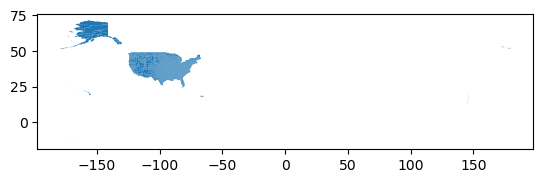

In [5]:
#plot counties to check geometries work
counties.plot()

In [6]:
#output spills to check table
#spills

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [7]:
#update pandas display options to display all column when looking at dataframes
pd.set_option("display.max.columns", None)

In [8]:
# 1. Use .head() to check 'spills' head
spills.head(3)

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0


In [9]:
# 2. simplify by updating column names to small caps
spills.columns = spills.columns.str.lower()

In [10]:
# 3. check data types of columns using .dtypes
spills.dtypes

spill number               int64
program facility name     object
street 1                  object
street 2                  object
locality                  object
county                    object
zip code                  object
swis code                  int64
dec region                 int64
spill date                object
received date             object
contributing factor       object
waterbody                 object
source                    object
close date                object
material name             object
material family           object
quantity                 float64
units                     object
recovered                float64
dtype: object

In [11]:
# 4. Check the unique values in the material_family column using .unique()

print(spills['material family'].unique())

['Other' 'Petroleum' 'Hazardous Material' 'Oxygenates']


In [12]:
# 5. Check the unique values in the county column using .unique()

print(spills['county'].unique())

['Westchester' 'Queens' 'Bronx' 'Sullivan' 'Cortland' 'New York' 'Ulster'
 'Kings' 'Orange' 'Dutchess' 'Onondaga' 'Saratoga' 'Cayuga' 'Oswego'
 'Warren' 'Niagara' 'Rockland' 'Nassau' 'Jefferson' 'Schenectady' 'Albany'
 'Monroe' 'St Lawrence' 'Richmond' 'Clinton' 'Lewis' 'Essex' 'Chenango'
 'Erie' 'Livingston' 'Wayne' 'Suffolk' 'Orleans' 'Ontario' 'Genesee'
 'Otsego' 'Tompkins' 'Madison' 'Chemung' 'Seneca' 'Oneida' 'Broome'
 'Hamilton' 'Washington' 'Schuyler' 'Franklin' 'Columbia' 'Fulton'
 'Herkimer' 'Schoharie' 'Rensselaer' 'Montgomery' 'Putnam' 'Delaware'
 'New Jersey - Region 2' 'Steuben' 'Tioga' 'Chautauqua' 'Cattaraugus'
 'Wyoming' 'Yates' 'Greene' 'Pennsylvania - Region 9' 'Allegany'
 'New Jersey - Region 3 (N)' 'Cattaraugus Indian Reservation'
 'New Jersey - Region 3 (T)' 'Canada - Region 6' 'Canada - Region 9'
 'Pennsylvania - Region 8' 'Vermont - Region 5 (R)' 'Vermont - Region 4'
 'Connecticut - Region 3 (N)' 'Pennsylvania - Region 3'
 'Tuscarora Indian Reservation' 'Connecti

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [13]:
# Convert the date to datetime64
spills['spill date'] = pd.to_datetime(spills['spill date'])

In [14]:
# select data between Jan 1st, 2023 and Oct 31, 2023 and name as petr_23

petr_23 = spills.loc[(spills['material family'] == 'Petroleum') & (spills['spill date'] > '01/01/2023') & (spills['spill date'] < '10/31/2023')]

2. Verify that `petr_23` only has data for petroleum spills 

In [15]:
# print unique values of petr_23 to check that only petroleum spills are included

petr_23['material family'].unique() 

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [16]:
# verify that only 2023 data has been included

petr_23['spill date'].dt.year.unique()

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [17]:
# verify that only Jan to Oct 2023 has been included

petr_23['spill date'].dt.month.unique() #confirmed

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [18]:
# Start with petr_23 and include bullets above to create a new df called 'spills_per_county'

# use sort_index() method to order the index
petr_23.reset_index(inplace=True, drop=True)

#check index has been reset
petr_23.head()

,spill number,program facility name,street 1,street 2,locality,county,zip code,swis code,dec region,spill date,received date,contributing factor,waterbody,source,close date,material name,material family,quantity,units,recovered
0,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
1,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
2,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
3,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
4,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,waste oil/used oil,Petroleum,0.0,NaN,0.0


In [19]:
#group by county, reset the index so that integar numbers start from 0, and specify column 1 as county and column 2 as n_spills

spills_per_county = petr_23.groupby('county')['county'].count().reset_index(name='n_spills')

spills_per_county #check output

,county,n_spills
0,Albany,204
1,Allegany,30
2,Bronx,143
3,Broome,74
4,Cattaraugus,46
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,730
62,Wyoming,24


In [20]:
#check numbers
spills_per_county.n_spills.sum()


7124

## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [21]:
# 1. Use .head() to check 'counties' head
counties.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."


In [22]:
# 2. update column names to small caps
counties.columns = counties.columns.str.lower()

In [23]:
# 3. check data types of columns using .dtypes
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [24]:
# 4. check crs
counties.crs  #EPSG:4269

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [25]:
#add geometry column
counties = gpd.GeoDataFrame(counties, # data
                                    # specify geometry column
                                    geometry='geometry',
                                    # specify CRS
                                    crs='EPSG:4269'
                    )

<AxesSubplot:>

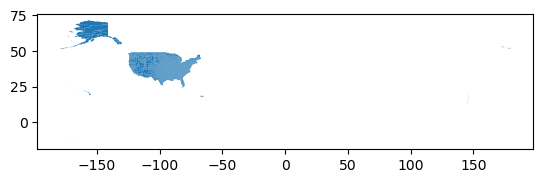

In [26]:
# 5. plot dataframe using plot()
counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

<AxesSubplot:>

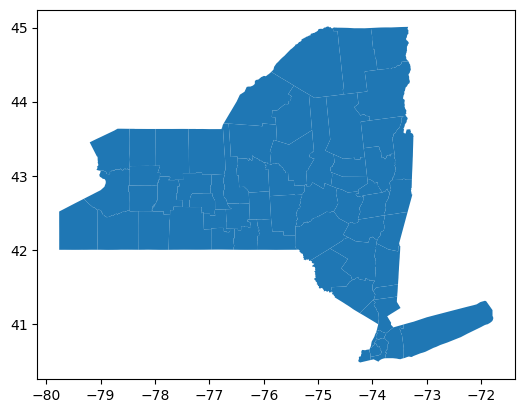

In [27]:
# select all counties in New York and store as a new variable 'ny_counties' and then plot

ny_counties = counties[counties['statefp'] == '36']

ny_counties.plot()

## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [28]:
# 1. use .unique() to find individual names of counties in 'namelsad' column for ny_counties to print without repetition
ny_counties.namelsad.unique()

array(['Steuben County', 'Saratoga County', 'Allegany County',
       'Oswego County', 'Ulster County', 'St. Lawrence County',
       'Schuyler County', 'Essex County', 'Suffolk County',
       'Hamilton County', 'Dutchess County', 'Otsego County',
       'Tompkins County', 'Albany County', 'Cayuga County',
       'Greene County', 'Herkimer County', 'Warren County',
       'Jefferson County', 'Clinton County', 'Nassau County',
       'Madison County', 'Washington County', 'Westchester County',
       'Lewis County', 'Ontario County', 'Cortland County',
       'Richmond County', 'Erie County', 'Putnam County',
       'Montgomery County', 'Sullivan County', 'Orleans County',
       'Oneida County', 'Cattaraugus County', 'Yates County',
       'Tioga County', 'Monroe County', 'Schoharie County',
       'Broome County', 'Rensselaer County', 'Seneca County',
       'Queens County', 'Genesee County', 'Wayne County',
       'Niagara County', 'Kings County', 'Chemung County',
       'Wyoming C

In [29]:
#count how many there are to compare
ny_counties.namelsad.count()

62

In [30]:
# 2. use .unique() to find individual names of counties in 'namelsad' column for spills_per_county
spills_per_county.county.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

In [31]:
#count how many there are to compare
spills_per_county.county.count()

64

In [32]:
# 3. Use the numpy function setdiff1d() to find the county names that are in spills_per_county, but not in ny_counties
np.setdiff1d(spills_per_county, ny_counties, assume_unique=True)

array([204, 30, 143, 74, 46, 26, 54, 31, 37, 52, 60, 35, 40, 156, 279, 56,
       41, 32, 50, 39, 9, 56, 108, 176, 41, 59, 40, 254, 62, 569,
       'New Jersey - Region 2', 6, 172, 88, 107, 195, 66, 328, 15, 68, 34,
       118, 320, 105, 52, 160, 158, 76, 32, 11, 25, 'St Lawrence', 65, 72,
       716, 83, 28, 36, 'Tuscarora Indian Reservation', 1, 158, 76, 96,
       38, 730, 24, 6], dtype=object)

In [33]:
# 4. Find the county names that are in ny_counties, but not in spills_per_county
np.setdiff1d(ny_counties, spills_per_county, assume_unique=True)

array(['36', '101', '00974148', ..., '+40.8487111', '-073.8529390',
       <POLYGON ((-73.9 40.9, -73.9 40.9, -73.9 40.9, -73.9 40.9, -73.9 40.9, -73.9...>],
      dtype=object)

In [34]:
# 5. Check the number of spills in 'Tuscarora Indian Reservation'
spills_per_county[spills_per_county.county == 'Tuscarora Indian Reservation'].n_spills

56    1
Name: n_spills, dtype: int64

### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [35]:
# 1. Check the row in spills_per_county that has 'St Lawrence'
spills_per_county[spills_per_county.county=='St Lawrence']

,county,n_spills
50,St Lawrence,65


In [36]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [37]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [38]:
# 4. Check the row in spills_per_county that has 'St Lawrence'
spills_per_county.at[st_lawrence_index,'county'] = 'St. Lawrence'

In [39]:
# 5. Check the update was successful
spills_per_county.county.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St. Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [40]:
# 1. Update the 'name' column in ny_counties so that it matches with 'county' in spills_per_county

ny_counties = ny_counties.rename(columns = {'name' : 'county'})

ny_counties = ny_counties[['county', 'geometry', 'statefp']]


In [41]:
# 2. Over-write ny_counties as the inner join of the spills_per_county and ny_counties dataframes
ny_counties = pd.merge(ny_counties,
                      spills_per_county,
                      how = 'inner',
                      on = 'county')

#update index
ny_counties = ny_counties.set_index('county')
ny_counties

,geometry,statefp,n_spills
county,,,
Steuben,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",36,72
Saratoga,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",36,158
Allegany,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",36,30
Oswego,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",36,68
Ulster,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",36,158
...,...,...,...
Livingston,"POLYGON ((-77.65085 42.58037, -77.65159 42.580...",36,59
Delaware,"POLYGON ((-74.66969 42.06782, -74.67035 42.067...",36,40
Orange,"POLYGON ((-74.24491 41.60376, -74.24456 41.603...",36,328


In [42]:
#check number of spills in Niagara
print(ny_counties.loc[['Niagara']])

                                                  geometry statefp  n_spills
county                                                                      
Niagara  POLYGON ((-78.49165 43.08396, -78.49179 43.084...      36        88


In [43]:
#3 add value of one to niagara n_spills to account for missing value (Tuscarora Indian Reservation)

ny_counties.at['Niagara', 'n_spills'] += 1

In [44]:
#check that the number of spills in Niagara has been updated
print(ny_counties.loc[['Niagara']])

                                                  geometry statefp  n_spills
county                                                                      
Niagara  POLYGON ((-78.49165 43.08396, -78.49179 43.084...      36        89


In [45]:
#check geometries column

ny_counties = gpd.GeoDataFrame(ny_counties,
                              geometry = 'geometry',
                              crs = 'EPSG:4269')

In [46]:
#print output to check that geometries have been included
ny_counties

,geometry,statefp,n_spills
county,,,
Steuben,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",36,72
Saratoga,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",36,158
Allegany,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",36,30
Oswego,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",36,68
Ulster,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",36,158
...,...,...,...
Livingston,"POLYGON ((-77.65085 42.58037, -77.65159 42.580...",36,59
Delaware,"POLYGON ((-74.66969 42.06782, -74.67035 42.067...",36,40
Orange,"POLYGON ((-74.24491 41.60376, -74.24456 41.603...",36,328


## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

(-80.16184495, -71.37823605, 40.24961365, 45.24282935)

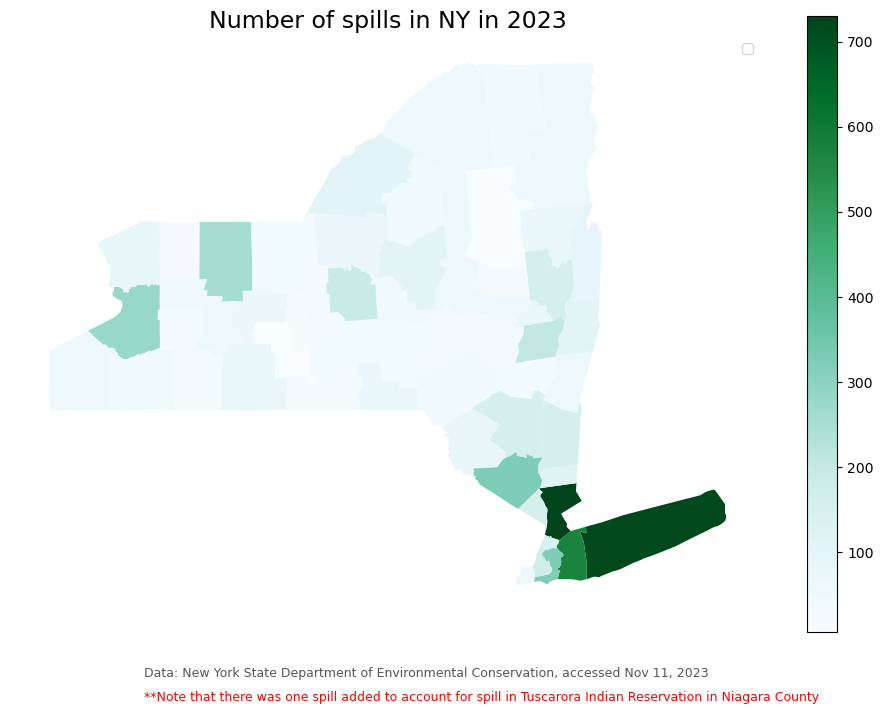

In [47]:
# Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023
#this allows us to visualize aggregate data per region

fig, ax = plt.subplots(figsize = (12,8)) #create figure boundaries

ny_counties.plot(ax=ax, #specify ax parameter
                 column = 'n_spills', #map the n_spills column as variable
                 cmap = 'BuGn', #customize color map
                 #edgecolor = "0.7", #define color
                 legend=True #include legend
                )

ax.set_title('Number of spills in NY in 2023', fontsize = 17)
ax.legend(labels='Number of spills')

# annotate the data source
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 11, 2023", 
            xy=(0.12,0.05), # position
            xycoords='figure fraction',
            fontsize=9, 
            color='#555555')

# annotate the one spill in Tuscarora Indian Reservation within Niagara county
ax.annotate("**Note that there was one spill added to account for spill in Tuscarora Indian Reservation in Niagara County", 
            xy=(0.12,0.02), # position
            xycoords='figure fraction',
            fontsize=9, 
            color='red')

# remove axis around map
ax.axis('off')


## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.